In [58]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import datasets
import matplotlib.pyplot as plt

In [59]:
#Data
data = datasets.load_iris()

#print(data)

In [60]:
x = data.data
y = data.target
z = data.target_names

In [61]:
#split dataset
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3)

#data shapes
print(x_train.shape)
print(x_validation.shape)

(105, 4)
(45, 4)


In [62]:
#Build model
model = Sequential()
model.add(Dense(100,input_shape=(4,), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               500       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [64]:
#compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [65]:
#fit the model
hist = model.fit(x_train,y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 1.3503 - accuracy: 0.3238
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0671 - accuracy: 0.4286
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 1.1298 - accuracy: 0.4286
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 1.1535 - accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.9591 - accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9274 - accuracy: 0.5810
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9465 - accuracy: 0.4286
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0176 - accuracy: 0.4857
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9720 - accuracy: 0.5333
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8707 - accuracy: 0.5048
Epoch 11/50
4/4 [====================

Text(0.5, 0, 'epoch')

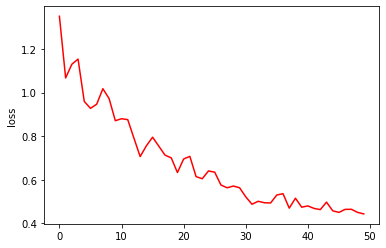

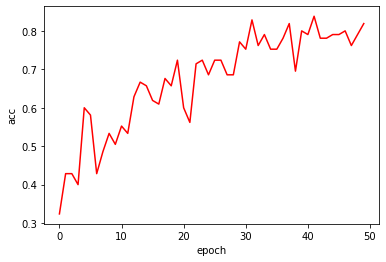

In [66]:
plt.figure()
#plt.plot(hist.history['validation_loss'], 'b')
plt.plot(hist.history['loss'], 'r')
plt.ylabel('loss')

plt.figure()
#plt.plot(hist.history['validation_accuracy'], 'b')
plt.plot(hist.history['accuracy'], 'r')
plt.ylabel('acc')
plt.xlabel('epoch')

In [67]:
#evaluate
model.evaluate(x_validation, y_validation)

2/2 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.9333


[0.33160391449928284, 0.9333333373069763]

In [68]:
#prediction for 1st 10 obs.
pred = model.predict(x_validation[:10])
print(pred)

[[0.94423306 0.04940585 0.00636112]
 [0.00126149 0.31084627 0.68789226]
 [0.02778498 0.56910604 0.403109  ]
 [0.00100691 0.25959876 0.7393943 ]
 [0.0010667  0.2699621  0.7289712 ]
 [0.01303799 0.43310106 0.55386096]
 [0.88559055 0.09571143 0.01869805]
 [0.94035554 0.05198127 0.00766323]
 [0.9450146  0.04785037 0.00713508]
 [0.9064302  0.07943399 0.01413588]]


In [69]:
p = np.argmax(pred, axis=1)

print(p)
print(y_validation[:10])

[0 2 1 2 2 2 0 0 0 0]
[0 2 1 2 2 1 0 0 0 0]


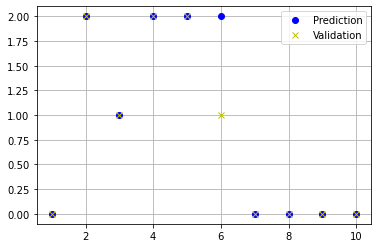

False

In [80]:
q = np.linspace(1,10, num=10)

plt.plot(q,p, 'o', color= 'b', label='Prediction')
plt.plot(q,y_validation[:10], 'x', color= 'y', label='Validation')
plt.grid()
plt.legend()
plt.show()

np.allclose(p, y_validation[:10], rtol=1e-05, atol=1e-08, equal_nan=False)

In [70]:
#prediction result

for i in p:
	print("prediction-class: {}, Name: {}".format(i,z[i]))

prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 1, Name: versicolor
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
